# 딥러닝을 활용한 분석
(이 파일은 맥북 vs code 주피터 노트북 환경에서 작성되었습니다)

siganl dataset이 이미지 데이터이기에 CNN을 이용해서 분석을 시도했다.

## 첫 시도

- 모델 생성

Epoch 1/35
255/255 [==============================] - 8s 32ms/step - loss: 0.5221 - accuracy: 0.7257 - val_loss: 0.5005 - val_accuracy: 0.7266
Epoch 2/35
255/255 [==============================] - 8s 32ms/step - loss: 0.4065 - accuracy: 0.7760 - val_loss: 0.4686 - val_accuracy: 0.7663
Epoch 3/35
255/255 [==============================] - 8s 33ms/step - loss: 0.3424 - accuracy: 0.8262 - val_loss: 0.9179 - val_accuracy: 0.4914
Epoch 4/35
255/255 [==============================] - 9s 34ms/step - loss: 0.3011 - accuracy: 0.8569 - val_loss: 0.8664 - val_accuracy: 0.5695
Epoch 5/35
255/255 [==============================] - 9s 35ms/step - loss: 0.2705 - accuracy: 0.8752 - val_loss: 0.9948 - val_accuracy: 0.5400
Epoch 6/35
255/255 [==============================] - 9s 35ms/step - loss: 0.2522 - accuracy: 0.8847 - val_loss: 0.6915 - val_accuracy: 0.6618
Epoch 7/35
255/255 [==============================] - 9s 37ms/step - loss: 0.2410 - accuracy: 0.8903 - val_loss: 0.6876 - val_accuracy: 0.6912

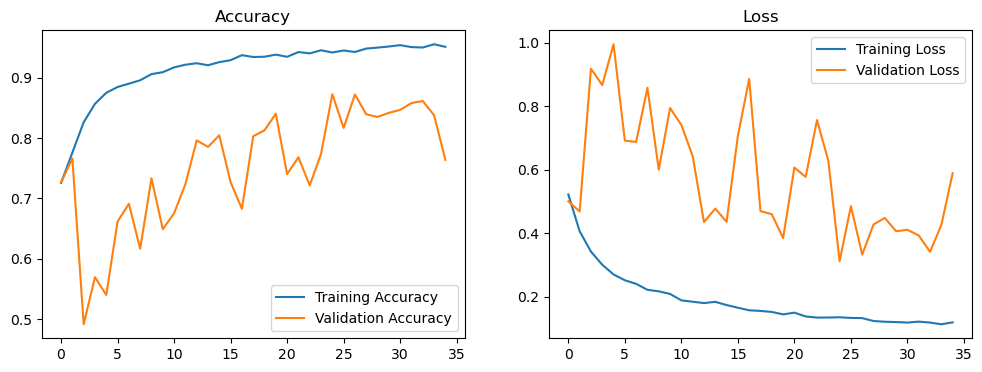

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

def load_images_from_folder(folder):
    # 폴더에서 이미지를 로드하고 리사이즈하는 함수
    images = []
    for filename in glob.glob(f'{folder}/*.jpeg'):
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR에서 RGB로 색상 변환
        img = cv2.resize(img, (64, 64))  # 이미지를 64x64 크기로 리사이즈
        images.append(img)
    return np.array(images)

# 데이터 로드 및 전처리
X_0 = load_images_from_folder('/Users/east_star/Desktop/DL/Signal/train/0')
X_1 = load_images_from_folder('/Users/east_star/Desktop/DL/Signal/train/1')
y_0 = np.zeros(X_0.shape[0])  # '0' 대한 레이블
y_1 = np.ones(X_1.shape[0])   # '1' 대한 레이블

X = np.concatenate((X_0, X_1), axis=0)  # 이미지 데이터 결합
y = np.concatenate((y_0, y_1), axis=0)  # 레이블 데이터 결합

# 훈련 세트와 검증 세트로 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 증강 및 정규화 설정
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 정규화
    rotation_range=20,  # 회전 범위
    width_shift_range=0.2,  # 가로 이동 범위
    height_shift_range=0.2,  # 세로 이동 범위
    shear_range=0.2,  # 전단 변환 범위
    zoom_range=0.2,  # 줌 범위
    horizontal_flip=True,  # 수평 뒤집기
    fill_mode='nearest'  # 이미지를 증강할 때 경계 처리 방식
)

val_datagen = ImageDataGenerator(rescale=1./255)  # 검증 데이터에 대한 정규화만 적용

# CNN 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),  # 32개 필터를 가진 컨볼루션 레이어
    MaxPooling2D(2, 2),  # 2x2 맥스풀링 레이어
    Conv2D(64, (3, 3), activation='relu'),  # 64개 필터를 가진 컨볼루션 레이어
    MaxPooling2D(2, 2),  # 2x2 맥스풀링 레이어
    Conv2D(128, (3, 3), activation='relu'),  # 128개 필터를 가진 컨볼루션 레이어
    MaxPooling2D(2, 2),  # 2x2 맥스풀링 레이어
    Flatten(),  # 데이터를 1차원으로 평탄화
    Dense(512, activation='relu'),  # 512개 뉴런을 가진 완전 연결 레이어
    Dropout(0.5),  # 50% 드롭아웃
    Dense(1, activation='sigmoid')  # 출력 레이어 (시그모이드 활성화 함수 사용)
])

# 모델 컴파일
# 옵티마이저로 adam을 사용, 손실 함수로는 이진 크로스엔트로피
# 정확도(accuracy)를 기준으로 모델의 성능을 평가합니다.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),  # 훈련 데이터
    validation_data=val_datagen.flow(X_val, y_val),  # 검증 데이터
    epochs=35  # 에포크 수
)

# 훈련 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

test dataset에 대해 훈련된 모델을 평가해본다

137/137 [==============================] - 1s 10ms/step - loss: 0.6063 - accuracy: 0.7644
Test Accuracy: 0.7644230723381042, Test Loss: 0.6062823534011841


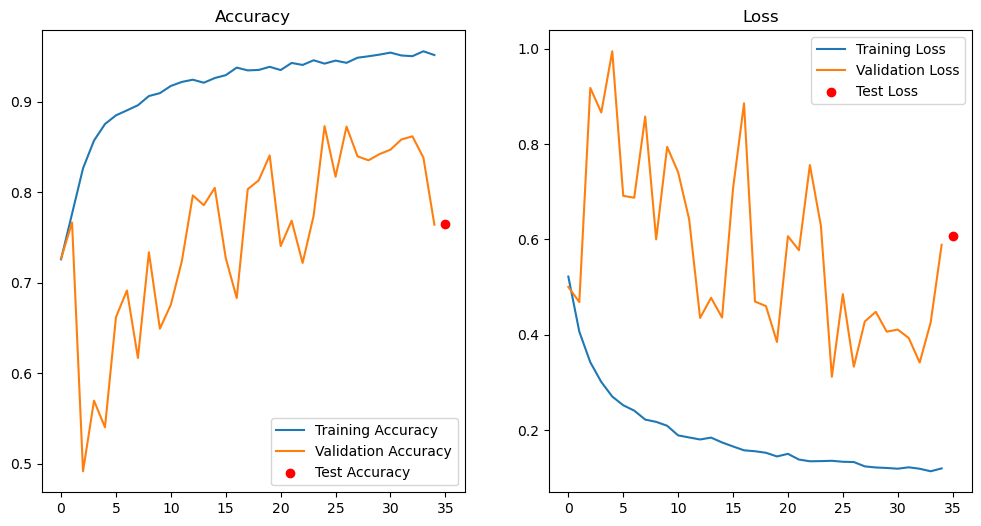

In [2]:
# Test 데이터 폴더 경로
test_folder_0 = '/Users/east_star/Desktop/DL/Signal/test/0'  # '0' 레이블의 이미지가 있는 폴더
test_folder_1 = '/Users/east_star/Desktop/DL/Signal/test/1'  # '1' 레이블의 이미지가 있는 폴더

# Test 데이터 로드
X_test_0 = load_images_from_folder(test_folder_0)
X_test_1 = load_images_from_folder(test_folder_1)

# Test 데이터 레이블 생성
y_test_0 = np.zeros(X_test_0.shape[0])  # '0' 대한 레이블
y_test_1 = np.ones(X_test_1.shape[0])   # '1' 대한 레이블

# Test 데이터와 레이블 결합
X_test = np.concatenate((X_test_0, X_test_1), axis=0)
y_test = np.concatenate((y_test_0, y_test_1), axis=0)

# Test 데이터 정규화
X_test = X_test / 255.0

# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

# 훈련 및 검증 결과와 함께 테스트 결과 시각화
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.scatter(x=len(history.history['accuracy']), y=test_accuracy, label='Test Accuracy', color='red')  # 테스트 정확도
plt.title('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.scatter(x=len(history.history['loss']), y=test_loss, label='Test Loss', color='red')  # 테스트 손실
plt.title('Loss')
plt.legend()

plt.show()

### 첫번째 모델의 문제점

오버피팅의 문제점이 발생하고 있다. 해당 문제를 해결하기 위해서 하이퍼 파라미터를 조절해서 학습을 다시 수행했다.

## 두 번째 시도

Epoch 1/35
255/255 [==============================] - 23s 87ms/step - loss: 1.7311 - accuracy: 0.6962 - val_loss: 1.5320 - val_accuracy: 0.7192
Epoch 2/35
255/255 [==============================] - 23s 90ms/step - loss: 1.3853 - accuracy: 0.7356 - val_loss: 1.2933 - val_accuracy: 0.7192
Epoch 3/35
255/255 [==============================] - 23s 90ms/step - loss: 1.1823 - accuracy: 0.7615 - val_loss: 1.1401 - val_accuracy: 0.7374
Epoch 4/35
255/255 [==============================] - 23s 89ms/step - loss: 0.9840 - accuracy: 0.7966 - val_loss: 1.1166 - val_accuracy: 0.6402
Epoch 5/35
255/255 [==============================] - 23s 90ms/step - loss: 0.8294 - accuracy: 0.8194 - val_loss: 0.8071 - val_accuracy: 0.8076
Epoch 6/35
255/255 [==============================] - 23s 90ms/step - loss: 0.7177 - accuracy: 0.8396 - val_loss: 0.6576 - val_accuracy: 0.8871
Epoch 7/35
255/255 [==============================] - 23s 90ms/step - loss: 0.6281 - accuracy: 0.8536 - val_loss: 0.5332 - val_accuracy:

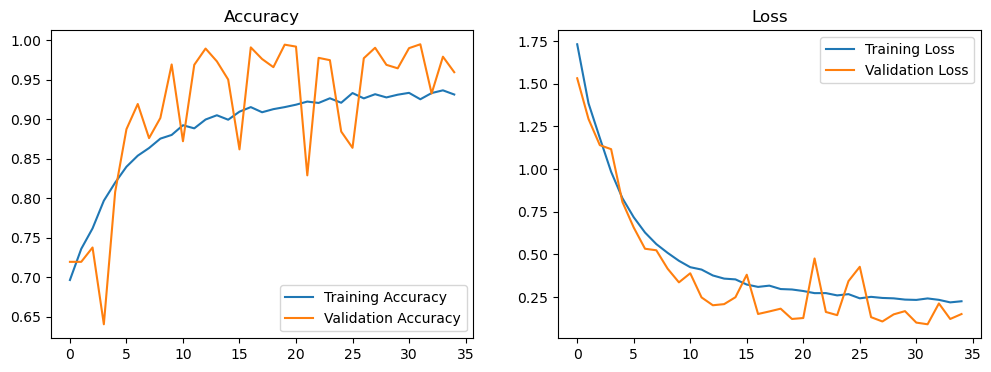

In [3]:
# 코드 수정
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2

# CNN 모델 수정
model = Sequential([
    # 32개의 필터를 가진 컨볼루션 레이어를 추가. 입력 이미지는 64x64 크기의 RGB 이미지.
    # 'same' 패딩을 사용하여 입력과 출력의 공간 크기를 동일하게 유지.
    # l2 규제를 사용하여 가중치를 규제하여 과적합을 방지.
    Conv2D(32, (3, 3), input_shape=(64, 64, 3), padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(), # 배치 정규화를 통해 레이어의 입력을 정규화.
    LeakyReLU(alpha=0.1), # LeakyReLU 활성화 함수를 적용. alpha는 음의 기울기를 정의함.
    MaxPooling2D(2, 2), # 2x2 맥스 풀링을 사용하여 공간 크기를 줄임.
    
    # 64개의 필터를 가진 두 번째 컨볼루션 레이어를 추가.
    Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(), # 배치 정규화 적용.
    LeakyReLU(alpha=0.1), # LeakyReLU 활성화 함수 적용.
    MaxPooling2D(2, 2), # 맥스 풀링 적용.
    
    # 새로운 컨볼루션 레이어 추가
    Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2, 2),

    # 완전 연결 레이어 전에 드롭아웃 비율을 조정
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.6),  # 드롭아웃 비율을 60%로 증가

    # 출력 레이어
    Dense(1, activation='sigmoid')
])

# 옵티마이저의 학습률을 조정
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# 모델 컴파일
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),  # 훈련 데이터
    validation_data=val_datagen.flow(X_val, y_val),  # 검증 데이터
    epochs=35
)

# 훈련 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

test dataset에 대해 훈련된 모델을 평가해 본다

137/137 [==============================] - 3s 23ms/step - loss: 0.1505 - accuracy: 0.9659
Test Accuracy: 0.965888261795044, Test Loss: 0.15045559406280518


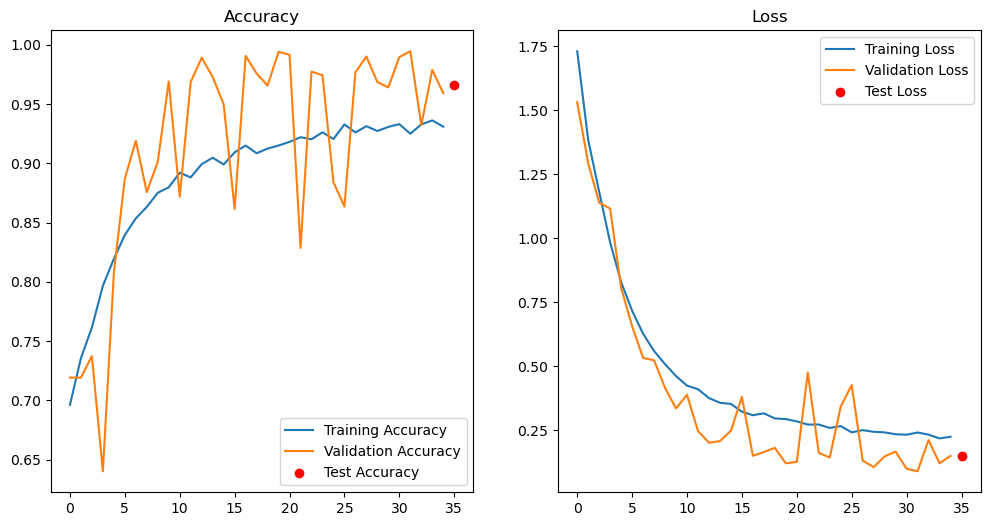

In [4]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

# 훈련 및 검증 결과와 함께 테스트 결과 시각화
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.scatter(x=len(history.history['accuracy']), y=test_accuracy, label='Test Accuracy', color='red')  # 테스트 정확도
plt.title('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.scatter(x=len(history.history['loss']), y=test_loss, label='Test Loss', color='red')  # 테스트 손실
plt.title('Loss')
plt.legend()

plt.show()

137/137 [==============================] - 3s 22ms/step


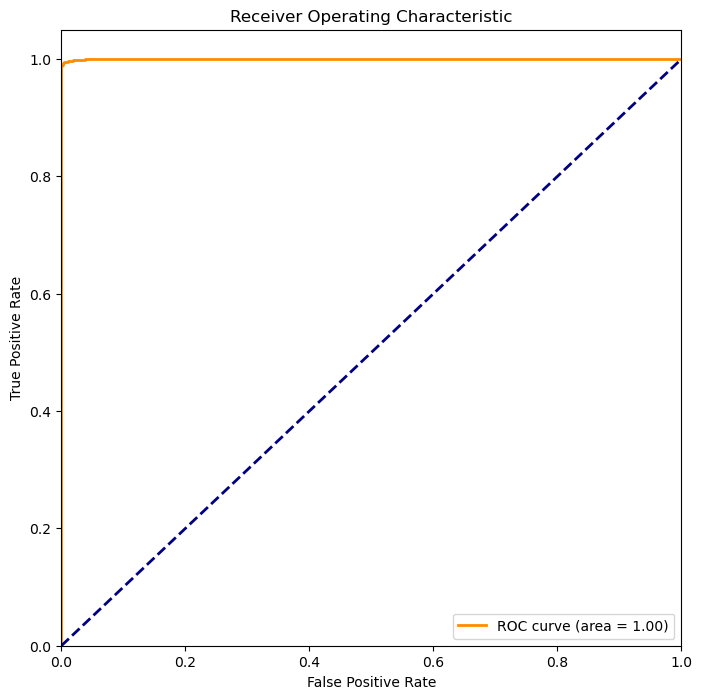

In [5]:
# ROC 곡선
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 모델을 사용하여 테스트 데이터에 대한 예측 확률을 계산합니다.
# `predict` 대신 `predict_proba`를 사용합니다. 이는 이진 분류 문제에서 1 클래스에 대한 예측 확률을 반환합니다.
y_pred_proba = model.predict(X_test).ravel()

# ROC 곡선의 TPR과 FPR을 계산합니다.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# AUC를 계산합니다.
roc_auc = auc(fpr, tpr)

# ROC 곡선을 시각화합니다.
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [6]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix

# 예측 확률이 아닌 클래스 레이블을 예측하도록 함.
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # 임계값을 적용하여 클래스 레이블을 결정합니다.

# 실제 레이블과 예측 레이블을 사용하여 혼동행렬을 계산합니다.
cm = confusion_matrix(y_test, y_pred)

# 혼동행렬 출력
print('Confusion Matrix:')
print(cm)

137/137 [==============================] - 3s 23ms/step
Confusion Matrix:
[[1065  149]
 [   0 3154]]


Precision: 약 95.49%

Recall: 100%

F1-Score: 약 97.69%

(위 코드 혼동 행렬 기준임)

### 두 번째 모델 평가

첫번째 모델에 비해 오버피팅이 발생하고 있지 않으며 test dataset에 대해서도 높은 Accuracy를 보이고 있다.
두 번째 모델을 signal dataset을 예측하는 모델로 쓰는 것이 적합해 보인다.

여기에서도 우려될 만한 문제는 그래프를 보면 스파크가 있다는 것인데 epoch 횟수가 늘어남에 따라 극 값이 감소하고 있음을 볼 수 있다.

epoch 횟수를 조금 더 늘리면 작은 진동으로 스파크를 바꿀 수 있지 않을까 생각해보며 딥러닝을 활용한 분석을 마친다.

# 머신러닝을 활용한 분석

랜덤 포레스트 분류기로 머신 러닝을 시도했다.

In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 이미지 로드 및 전처리 함수
def load_and_preprocess_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (32, 32))
        img_flat = img.flatten()
        images.append(img_flat)
        labels.append(label)
    return images, labels

# 압축 해제된 이미지 폴더 경로 설정
subdir_0 = '/Users/east_star/Desktop/DL/Signal/train/0'  # '0' 폴더
subdir_1 = '/Users/east_star/Desktop/DL/Signal/train/1'  # '1' 폴더

# 이미지 로드 및 전처리
images_0, labels_0 = load_and_preprocess_images(subdir_0, 0)
images_1, labels_1 = load_and_preprocess_images(subdir_1, 1)

# 데이터셋 결합 및 분할
X = np.array(images_0 + images_1)
y = np.array(labels_0 + labels_1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류기 초기화 및 훈련
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# 검증 세트에 대한 예측
y_pred = rf_classifier.predict(X_val)

# 모델 평가
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9543446244477173
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       572
           1       0.96      0.97      0.97      1465

    accuracy                           0.95      2037
   macro avg       0.95      0.94      0.94      2037
weighted avg       0.95      0.95      0.95      2037



## 모델 평가

1에 대해 더 높은 정밀도와 recall을 보여준다. 모델이 1을 분류하는 데 더 효과적임을 의미한다.

전반적으로 높은 정확도와 균형 잡힌 F1-점수는 모델이 두 클래스 모두 잘 분류하고 있음을 나타낸다.

모델이 제공된 데이터셋에 대해 효과적으로 학습하고, 일반화하는 능력이 뛰어남을 알 수 있다.

그럼 test dataset에 대해서도 만들어진 모델을 검증해보자.

## test dataset 적용

In [8]:
def load_and_preprocess_test_images(folder_0, folder_1):

    images_0, labels_0 = load_and_preprocess_images(folder_0, 0)
    images_1, labels_1 = load_and_preprocess_images(folder_1, 1)

    # 데이터셋 결합
    X_test = np.array(images_0 + images_1)
    y_test = np.array(labels_0 + labels_1)

    return X_test, y_test

# 테스트 데이터셋 폴더 경로 설정
test_dir_0 = '/Users/east_star/Desktop/DL/Signal/test/0'  # '0' 폴더
test_dir_1 = '/Users/east_star/Desktop/DL/Signal/test/1'  # '1' 폴더

# 테스트 데이터셋 로드 및 전처리
X_test, y_test = load_and_preprocess_test_images(test_dir_0, test_dir_1)

# 모델을 사용하여 테스트 데이터셋에 대한 예측 수행
y_test_pred = rf_classifier.predict(X_test)

# 모델 성능 평가
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_report)


Test Accuracy: 0.956959706959707
Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1214
           1       0.97      0.98      0.97      3154

    accuracy                           0.96      4368
   macro avg       0.95      0.94      0.95      4368
weighted avg       0.96      0.96      0.96      4368



### 결과 해석

훈련 결과와 테스트 결과 모두 비슷한 수준의 높은 정확도와 다른 성능 지표를 보여준다.

모델이 과적합되지 않고 일반화 능력이 좋음을 알 수 있다.

# 총평

정확도는 CNN을 이용한 분석과 머신러닝 비슷했다. 하지만 학습 속도는 머신러닝을 활용한 분석이 CNN을 이용한 방법에 비해 압도적으로 빨랐다.

딥러닝과 머신러닝을 적절히 잘 섞어서 사용할 수 있다면 높은 학습 속도와 높은 정확도를 보이지 않을까라는 생각이 들었다.

아직 자세히 알아보지는 않았고 어렴풋이 들어서 알고 있는 것은 explainable AI에 대한 연구가 있는 것으로 알고 있는데 그 분야가 궁금해졌다.